In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, Softmax
from tensorflow.keras.models import Model
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Read CSV file
df = pd.read_csv(r'C:\Users\admin\IKEAdata.csv')


# Print first few rows to check data structure
print(df.head())


# Check unique categories
print("Category statistics:")
print(df.iloc[:, 3].value_counts())

     title                                              image  \
0     MALM  C:\Users\admin\Downloads\app_30798308\malm-bed...   
1     MALM  C:\Users\admin\Downloads\app_30798308\malm-bed...   
2   HEMNES  C:\Users\admin\Downloads\app_30798308\hemnes-d...   
3  SLATTUM  C:\Users\admin\Downloads\app_30798308\slattum-...   
4     MALM  C:\Users\admin\Downloads\app_30798308\malm-bed...   

                                            describe category   ID  
0  A clean design that’s just as beautiful on all...      bed  1.0  
1  A clean design that’s just as beautiful on all...      bed  2.0  
2  A sofa, a single bed, a double bed and storage...      bed  3.0  
3  SLATTUM bed frame has soft upholstery and a pa...      bed  4.0  
4  A clean design that’s just as beautiful on all...      bed  5.0  
Category statistics:
category
chair    286
desk     280
shelf    269
bed      223
Name: count, dtype: int64


In [2]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    
    Load and preprocess image
    
    Parameters:
    image_path: image path
    target_size: target size
    
    Returns:
    preprocessed image array
    """
    # Load image
    img = load_img(image_path, target_size=target_size)
    
    # Convert to array
    img_array = img_to_array(img)
    
    # Expand dimensions
    img_array = np.expand_dims(img_array, axis=0)
    
    # MobileNet MobileNet preprocessing
    img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)
    
    return img_array

In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import shutil


# Read and clean data
df = pd.read_csv(r'C:\Users\admin\IKEAdata.csv')


# Remove rows with empty categories
df = df.dropna(subset=['category'])

print("Category statistics after cleaning:")
print(df['category'].value_counts())

def create_directory_structure(df):
    """
    Create directory structure for training
    """
    # Create base directory
    base_dir = 'ikea_images'
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)
    os.makedirs(base_dir)
    
    # Get unique categories
    categories = df['category'].unique()
    print("Categories list:")
    for cat in categories:
        print(f"- {cat}: {len(df[df['category'] == cat])} images")
    
    # Create subdirectories for each category
    for category in categories:
        category_dir = os.path.join(base_dir, str(category).strip())
        os.makedirs(category_dir)
        print(f"Created directory: {category_dir}")
        
    # Copy images to respective directories
    successful_copies = 0
    failed_copies = 0
    
    for idx, row in df.iterrows():
        src_path = str(row['image'])
        category = str(row['category']).strip()
        dest_dir = os.path.join(base_dir, category)
        
        try:
            if not os.path.exists(src_path):
                failed_copies += 1
                print(f"Source file does not exis): {src_path}")
                continue
                
            filename = os.path.basename(src_path)
            dest_path = os.path.join(dest_dir, filename)
            
            shutil.copy2(src_path, dest_path)
            successful_copies += 1
            
            if successful_copies % 100 == 0:
                print(f"Successfully processed {successful_copies} files")
                
        except Exception as e:
            failed_copies += 1
            print(f"Error processing file {src_path}: {str(e)}")
    
    print("Processing statistic):")
    print(f"Successfully copied: {successful_copies} files")
    print(f"Failed to copy: {failed_copies} file)")
    
    print("Number of images in each category:")
    for category in categories:
        category_dir = os.path.join(base_dir, str(category).strip())
        num_images = len(os.listdir(category_dir))
        print(f"- {category}: {num_images} images")
    
    return base_dir

# Create directory structure
base_dir = create_directory_structure(df)

Category statistics after cleaning:
category
chair    286
desk     280
shelf    269
bed      223
Name: count, dtype: int64
Categories list:
- bed: 223 images
- chair: 286 images
- desk: 280 images
- shelf: 269 images
Created directory: ikea_images\bed
Created directory: ikea_images\chair
Created directory: ikea_images\desk
Created directory: ikea_images\shelf
Successfully processed 100 files
Successfully processed 200 files
Successfully processed 300 files
Successfully processed 400 files
Successfully processed 500 files
Successfully processed 600 files
Successfully processed 700 files
Successfully processed 800 files
Successfully processed 900 files
Successfully processed 1000 files
Processing statistic):
Successfully copied: 1058 files
Failed to copy: 0 file)
Number of images in each category:
- bed: 223 images
- chair: 286 images
- desk: 280 images
- shelf: 269 images


Found 848 images belonging to 4 classes.
Found 210 images belonging to 4 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,492,292 (13.32 MB)

 Trainable params: 263,428 (1.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

C:\Users\admin\anaconda3\envs\UD_intro\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.4756 - loss: 1.3439

C:\Users\admin\anaconda3\envs\UD_intro\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 555ms/step - accuracy: 0.4796 - loss: 1.3330 - val_accuracy: 0.7667 - val_loss: 0.6140 - learning_rate: 0.0010
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 529ms/step - accuracy: 0.7314 - loss: 0.6533 - val_accuracy: 0.8095 - val_loss: 0.5305 - learning_rate: 0.0010
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 509ms/step - accuracy: 0.8088 - loss: 0.4909 - val_accuracy: 0.8143 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 500ms/step - accuracy: 0.8307 - loss: 0.4457 - val_accuracy: 0.8429 - val_loss: 0.4794 - learning_rate: 0.0010
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.8583 - loss: 0.3856 - val_accuracy: 0.8190 - val_loss: 0.5229 - learning_rate: 0.0010
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 491ms/step - accuracy: 0.8517 - loss: 0.4181 - val_accuracy: 0.8095 - val_loss: 0.5094 - learning_rate: 0.0010
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.8526 - loss: 0.3579 - val_

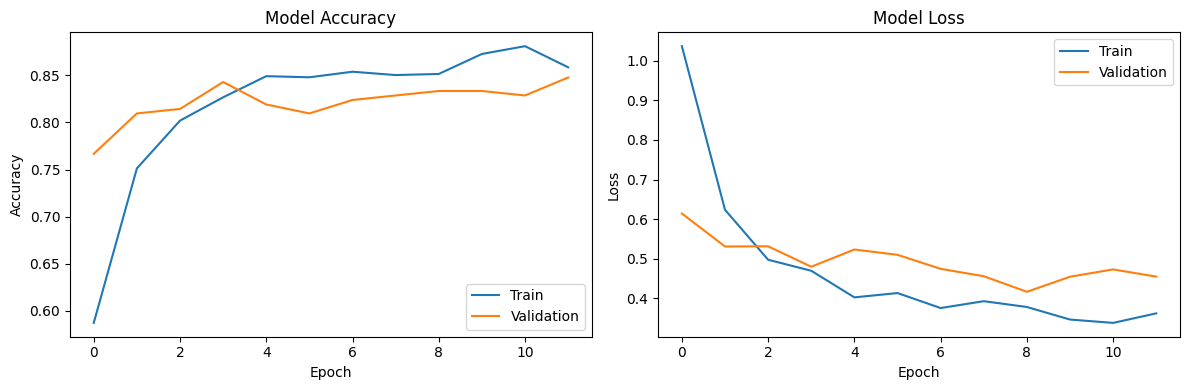

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set basic parameters
IMG_SIZE = 224  # Default input size for MobileNet
BATCH_SIZE = 32
NUM_CLASSES = 4  # bed, chair, desk, shelf

# Create data generator
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    validation_split=0.2,  #  20% for validation
    rotation_range=20,     #  Random rotation
    width_shift_range=0.2, #  Horizontal shift
    height_shift_range=0.2,#  Vertical shift
    horizontal_flip=True,  #  Horizontal flip
    zoom_range=0.15       #  Random zoom
)


# Create training and validation generators
train_generator = datagen.flow_from_directory(
    'ikea_images',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    'ikea_images',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# Build model
base_model = MobileNet(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)


# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


# Create final model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Print model structure
model.summary()


# Train model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2
        )
    ]
)


# Save model
model.save('ikea_mobilenet_model.h5')


# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import os
from tqdm import tqdm
import pickle

def create_feature_extractor():
    """
    Create feature extraction model
    """
    base_model = MobileNet(
        input_shape=(224, 224, 3),
        include_top=False,
        pooling='avg',
        weights='imagenet'
    )
    return base_model

def extract_features(img_path, model):
    """
    Extract features from a single image
    """
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x, verbose=0)
    return features[0]

def build_feature_database():
    """
    Build feature database for all images
    """
    feature_extractor = create_feature_extractor()
    
   
    # Store features and corresponding image paths
    features_dict = {}
    base_dir = 'ikea_images'
    
    print("Extracting features...")
    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            print(f"Processing category: {category}")
            for img_name in tqdm(os.listdir(category_path)):
                img_path = os.path.join(category_path, img_name)
                try:
                    features = extract_features(img_path, feature_extractor)
                    features_dict[img_path] = {
                        'features': features,
                        'category': category
                    }
                except Exception as e:
                    print(f"Error processing image {img_path}: {str(e)}")
    
    # Save feature database
    with open('image_features.pkl', 'wb') as f:
        pickle.dump(features_dict, f)
    
    return features_dict

def find_similar_images(query_img_path, features_dict, top_k=5):
    """
    
    Find images most similar to the query image
    """
    feature_extractor = create_feature_extractor()
    
    
    # Extract features from query image
    query_features = extract_features(query_img_path, feature_extractor)
    
    
    # Calculate similarity with all images
    distances = {}
    for img_path, data in features_dict.items():
        dist = np.linalg.norm(query_features - data['features'])
        distances[img_path] = {'distance': dist, 'category': data['category']}
    
    
    # Sort and return most similar images
    sorted_results = sorted(distances.items(), key=lambda x: x[1]['distance'])
    return sorted_results[:top_k]


# Build feature database
print("Starting to build feature database...")
features_dict = build_feature_database()


# Test search functionality
def test_search(test_image_path):
    """
    Test search functionality
    """
    print(f"Query image: {test_image_path}")
    similar_images = find_similar_images(test_image_path, features_dict)
    
    print("Most similar images:")
    for img_path, data in similar_images:
        print(f"Category: {data['category']}")
        print(f"Image path: {img_path}")
        print(f"Distance: {data['distance']:.4f}")
        print()


Starting to build feature database...
Extracting features...
Processing category: bed


100%|██████████| 223/223 [00:15<00:00, 14.71it/s]


Processing category: chair


100%|██████████| 286/286 [00:19<00:00, 14.52it/s]


Processing category: desk


100%|██████████| 280/280 [00:19<00:00, 14.03it/s]


Processing category: shelf


100%|██████████| 269/269 [00:18<00:00, 14.86it/s]


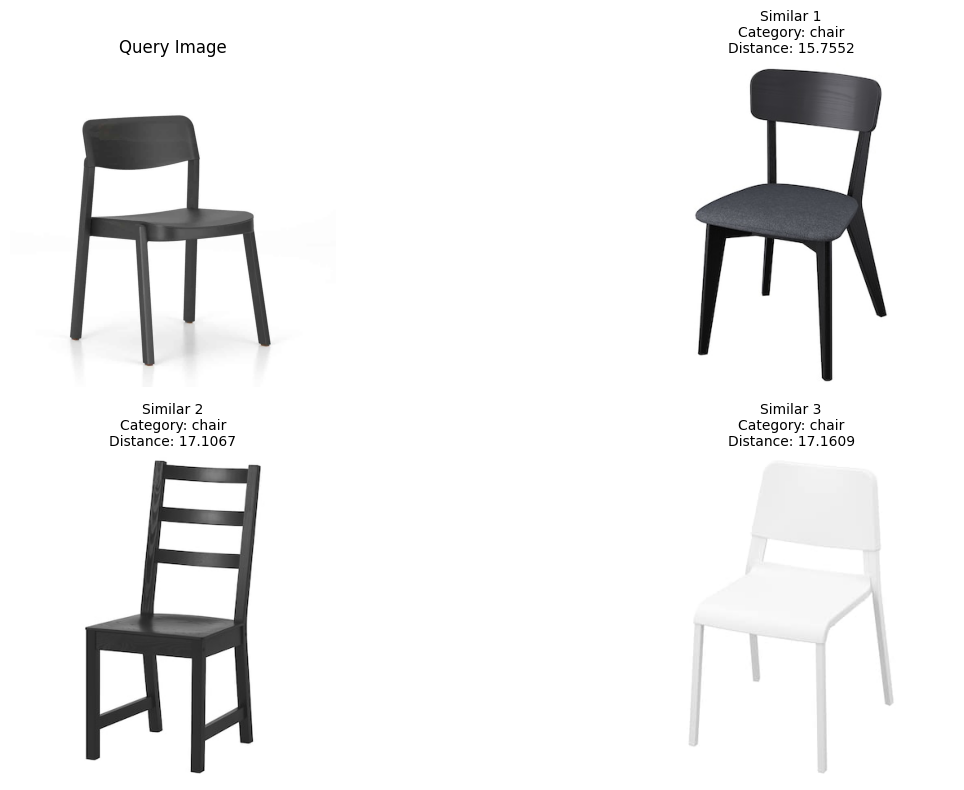

In [20]:
def find_similar_images(query_img_path, features_dict, top_k=5):
    """
    Find images most similar to the query image
    """
    feature_extractor = create_feature_extractor()
    query_features = extract_features(query_img_path, feature_extractor)
    
    distances = {}
    for img_path, data in features_dict.items():
        dist = np.linalg.norm(query_features - data['features'])
        distances[img_path] = {'distance': dist, 'category': data['category']}
    
    sorted_results = sorted(distances.items(), key=lambda x: x[1]['distance'])
    return sorted_results[:top_k]

def visualize_search_results(query_img_path, similar_images, figsize=(15, 8)):
    """
    Visualize search results
    """
    n_images = len(similar_images) + 1
    fig = plt.figure(figsize=figsize)
    
    plt.subplot(2, (n_images + 1) // 2, 1)
    query_img = image.load_img(query_img_path)
    plt.imshow(query_img)
    plt.title('Query Image', fontsize=12)
    plt.axis('off')
    
    for idx, (img_path, data) in enumerate(similar_images, start=2):
        plt.subplot(2, (n_images + 1) // 2, idx)
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.title(f'Similar {idx-1}\nCategory: {data["category"]}\nDistance: {data["distance"]:.4f}', 
                 fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def test_search_with_visualization(test_image_path, top_k=5):
    """
    Test search functionality with visualization
    """
    similar_images = find_similar_images(test_image_path, features_dict, top_k)
    visualize_search_results(test_image_path, similar_images)

# Test specific image
test_image_path = r"C:\Users\admin\Embla-Wooden-Stacking-Chair-Black-Stain.jpg"
test_search_with_visualization(test_image_path, top_k=3)